In [110]:
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10));

In [133]:
def preprocess(file):
    text = open(file).read()
    text = text[text.find('<body>'):]
    text = re.sub('<[^<]+>', "", text).replace('\n','').lower()
    text = re.sub( "[\[\]!/\.\,']", ' ', text )
    text = re.sub( '\s+', ' ', text ).strip()
    return text

In [73]:
letters_ord = list(range(ord('a'), ord('z')+1)) + [ord('ä'), ord('ö')]
letters = [chr(l) for l in letters_ord]

In [102]:
# TODO
ignore_chars = []
ignore_bigrams = []

def get_freqs(text):
    c = Counter(text)
    n = len(ag)-c[' ']
    stats = pd.Series(0.0, index=letters)
    stats_bigrams = pd.Series()
    for l in letters:
        stats[l] = c[l]/n
    bigrams = list(filter(lambda a: a != 0, [text[i:i+2] if (text[i] is not ' ' and text[i+1] is not ' ') else 0 for i in range(len(text)-1)]))
    c.update(bigrams)
    for b in bigrams:
        stats_bigrams[b] = c[b]/len(bigrams)
    return stats, stats_bigrams

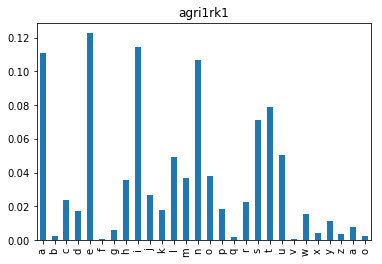

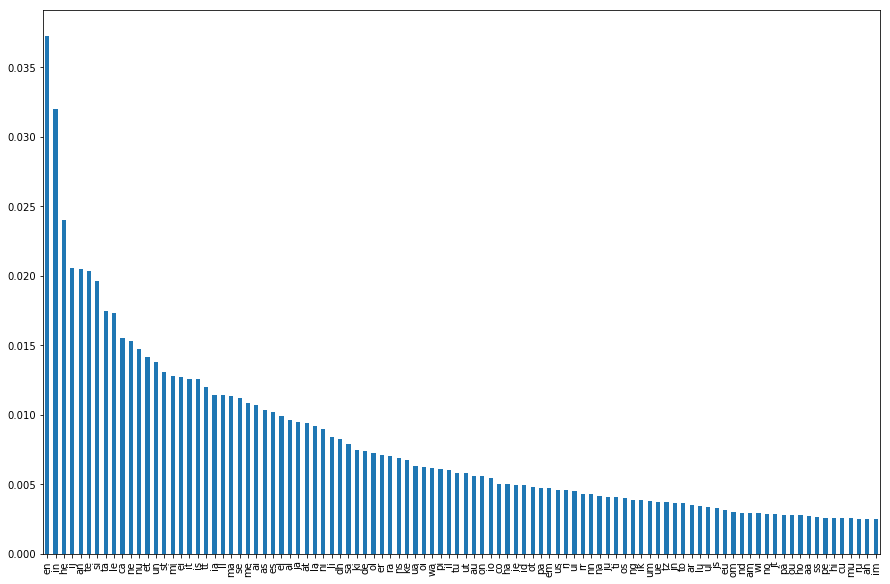

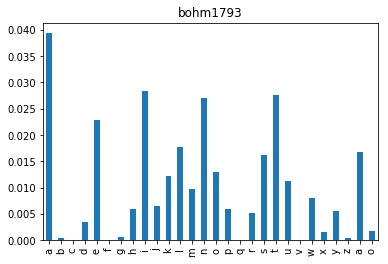

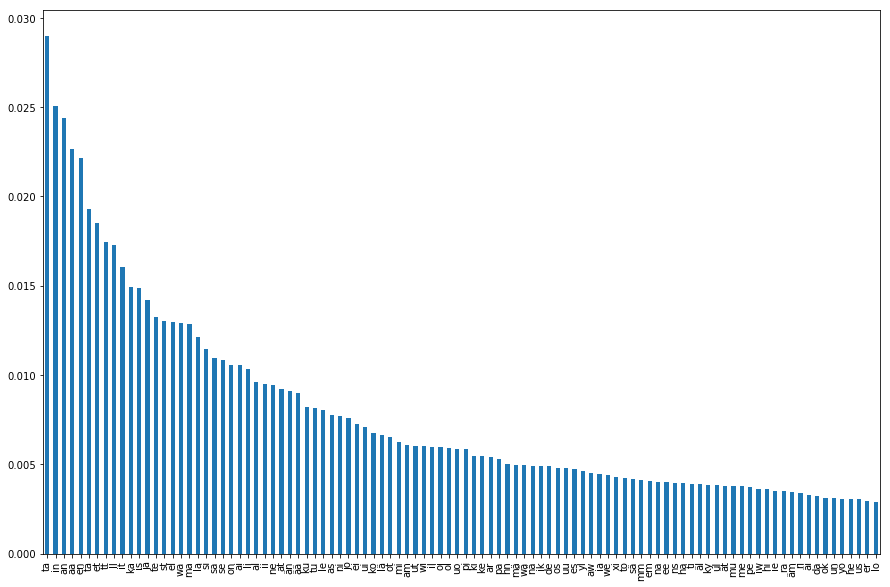

In [139]:
texts = ["data/obf/agri1rk1.xml", "data/obf/bohm1793.xml"]
for t in texts:
    text = preprocess(t)
    s, s_b = get_freqs(text)
    plt.figure()
    s.plot(kind='bar', title=t[9:-4])
    s_b = s_b.sort_values(ascending=False)
    plt.figure()
    s_b[:100].plot(figsize=(15,10), kind='bar')